In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.model_selection import train_test_split  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import accuracy_score  
import tensorflow as tf  
from tensorflow import keras  

In [2]:
train_data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test_data = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [3]:
print(train_data.shape)
print(train_data.head())

(42000, 785)
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0      

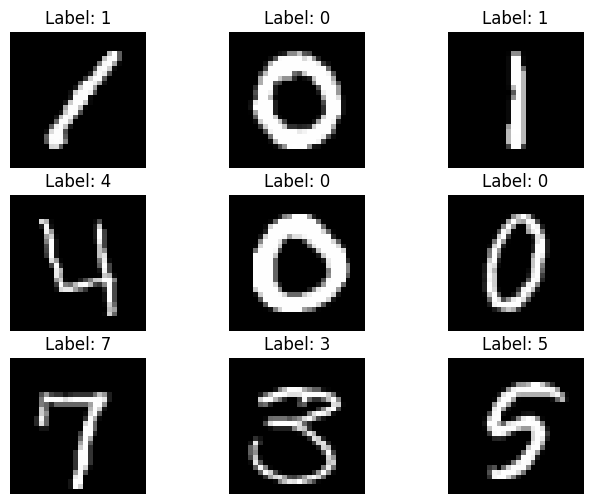

In [4]:
plt.figure(figsize=(8, 6))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(train_data.iloc[i, 1:].values.reshape(28, 28), cmap='gray')
    plt.title(f"Label: {train_data.iloc[i, 0]}")
    plt.axis("off")
plt.show()

In [5]:
X = train_data.iloc[:, 1:].values / 255.0  
y = train_data.iloc[:, 0].values 

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
X_test = test_data.values / 255.0

In [7]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))

Accuracy: 0.9629761904761904


In [8]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8431 - loss: 0.5354 - val_accuracy: 0.9507 - val_loss: 0.1724
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9566 - loss: 0.1415 - val_accuracy: 0.9620 - val_loss: 0.1272
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9707 - loss: 0.0924 - val_accuracy: 0.9657 - val_loss: 0.1157
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9801 - loss: 0.0642 - val_accuracy: 0.9690 - val_loss: 0.1002
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9869 - loss: 0.0435 - val_accuracy: 0.9602 - val_loss: 0.1472
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9882 - loss: 0.0374 - val_accuracy: 0.9676 - val_loss: 0.1129
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9907 - loss: 0.0313 - val_accuracy: 0.9683 - val_loss: 0.1158
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9923 - loss: 0.0246 - 

In [9]:
X_train_cnn = X_train.reshape(-1, 28, 28, 1) 
X_val_cnn = X_val.reshape(-1, 28, 28, 1)     
X_test_cnn = X_test.reshape(-1, 28, 28, 1)    

cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_cnn, y_train, epochs=10, validation_data=(X_val_cnn, y_val))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.8725 - loss: 0.4041 - val_accuracy: 0.9755 - val_loss: 0.0758
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.9790 - loss: 0.0655 - val_accuracy: 0.9817 - val_loss: 0.0526
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.9878 - loss: 0.0377 - val_accuracy: 0.9876 - val_loss: 0.0405
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.9913 - loss: 0.0263 - val_accuracy: 0.9898 - val_loss: 0.0338
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.9940 - loss: 0.0196 - val_accuracy: 0.9852 - val_loss: 0.0483
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.9947 - loss: 0.0155 - val_accuracy: 0.9904 - val_loss: 0.0294
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.9972 - loss: 0.0098 - val_accuracy: 0.9879 - val_loss: 0.0430
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.9970 -

In [10]:
predictions = cnn_model.predict(X_test_cnn)
pred_labels = np.argmax(predictions, axis=1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step


In [11]:
submission = pd.DataFrame({'ImageId': np.arange(1, len(pred_labels) + 1), 'Label': pred_labels})
submission.to_csv('submission.csv', index=False)